## Cyfrowe przetwarzanie sygnałów i obrazów
# Laboratorium nr 1 - Przetwarzanie i analiza sygnału EKG

Autorzy:
| Imię i nazwisko   | Numer indeksu |
|-------------------|:-------------:|
| Maksymilian Tara  | 264000        |
| Łukasz Gawron     | 264475        |

In [67]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.signal as sig


data_ekg1 = None
data_ekg_100 = None
data_ekg_noise = None

ekg1_time = None
ekg_100_time = None
ekg_noise_time = None

sampling_frequency_ekg1 = 1000
sampling_frequency_ekg_100 = 360
sampling_frequency_ekg_noise = 360

# Zadanie nr 1
Napisz skrypt w Pythonie/Matlabie umożliwiający wczytywanie i wizualizację badanych sygnałów. Program powinien umożliwiać obserwowanie wycinka
sygnału dla zadanego przedziału czasowego, skalowanie osi wykresów i ich opis oraz
zapis dowolnego wycinka sygnału do pliku o podanej nazwie.

# Dane:
- ekg1.txt – 12 kolumn odpowiada odprowadzeniom, fs = 1000 Hz
- ekg100.txt – 1 kolumna, fs = 360 Hz
- ekg_noise.txt – 1 kolumna: czas, 2 kolumna: wartości amplitud EKG, fs = 360 Hz

In [68]:
def load_signal_int_values_sampled(file_path: str):
    signal_data = []
    with open(file_path, "r+") as file:
        while True:
            line = file.readline()
            if not line:
                break
            values_row = line.lstrip().split()
            values_row = np.array(list(map(int, values_row)))

            signal_data.append(values_row)

    signal_data = np.array(signal_data)
    return np.array(signal_data)


def load_signal_float_values_sampled(file_path: str):
    signal_data = []
    with open(file_path, "r+") as file:
        while True:
            line = file.readline()
            if not line:
                break
            values_row = line.lstrip().split()
            values_row = np.array(list(map(float, values_row)))

            signal_data.append(values_row)

    signal_data = np.array(signal_data)
    return np.array(signal_data)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


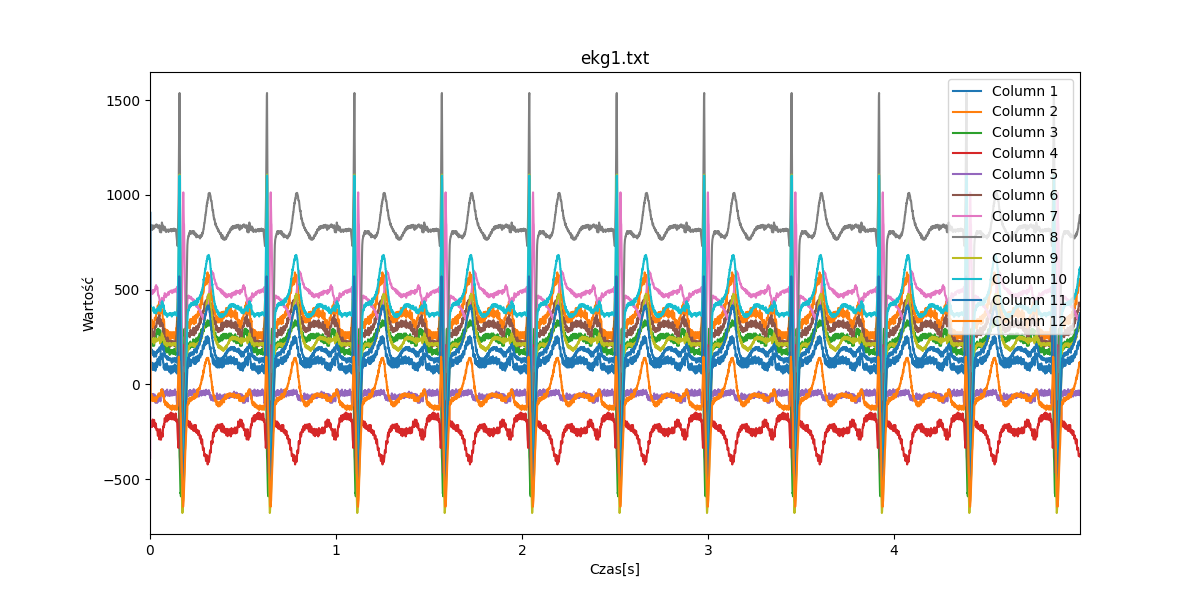

In [69]:
global data_ekg1, ekg1_time, sampling_frequency_ekg1

data_ekg1 = load_signal_int_values_sampled("./resources/ekg1.txt")
ekg1_time = np.arange(len(data_ekg1)) / sampling_frequency_ekg1

plt.figure(figsize=(12, 6))
plt.legend(loc="upper left")

for i in range(len(data_ekg1[0])):
    plt.plot(ekg1_time, data_ekg1[:, i])

plt.legend(["Column " + str(i + 1) for i in range(len(data_ekg1[0]))])
plt.title('ekg1.txt')
plt.xlabel('Czas[s]')
plt.ylabel('Wartość')
plt.xlim(ekg1_time[0], ekg1_time[len(ekg1_time) - 1])

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


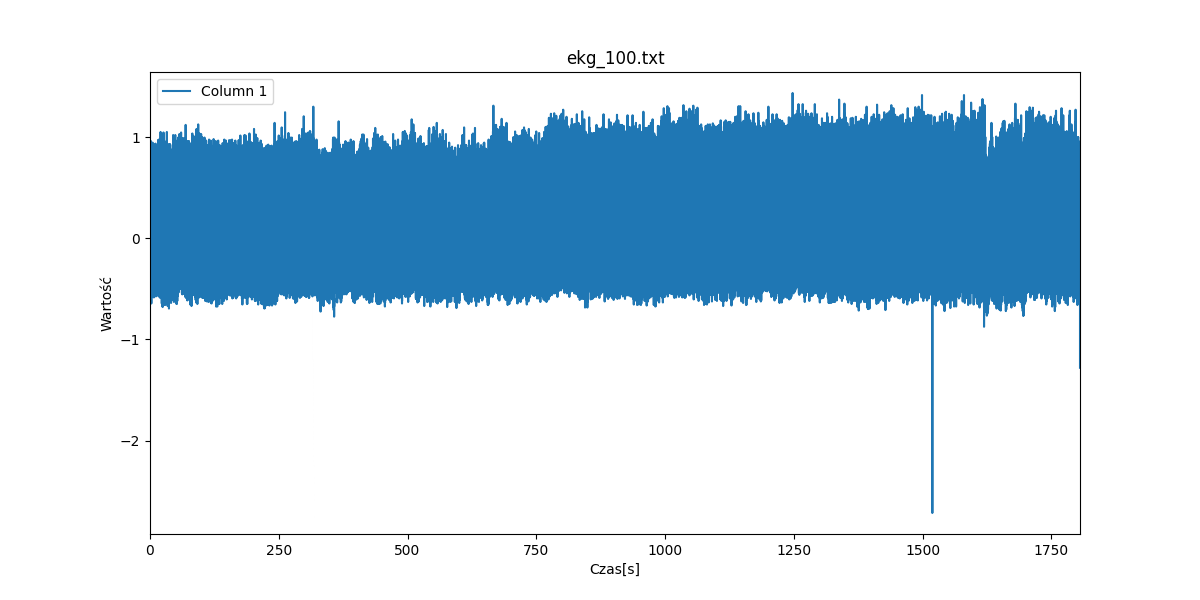

In [70]:
global data_ekg_100, ekg_100_time, sampling_frequency_ekg_100

data_ekg_100 = load_signal_float_values_sampled("./resources/ekg_100.txt")
ekg_100_time = np.arange(
    len(data_ekg_100)) / sampling_frequency_ekg_100

plt.figure(figsize=(12, 6))
plt.legend(loc="upper left")
    
plt.plot(ekg_100_time, data_ekg_100)

plt.legend(["Column " + str(i + 1) for i in range(len(data_ekg_100[0]))])
plt.title('ekg_100.txt')
plt.xlabel('Czas[s]')
plt.ylabel('Wartość')
plt.xlim(ekg_100_time[0], ekg_100_time[len(ekg_100_time) - 1])

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


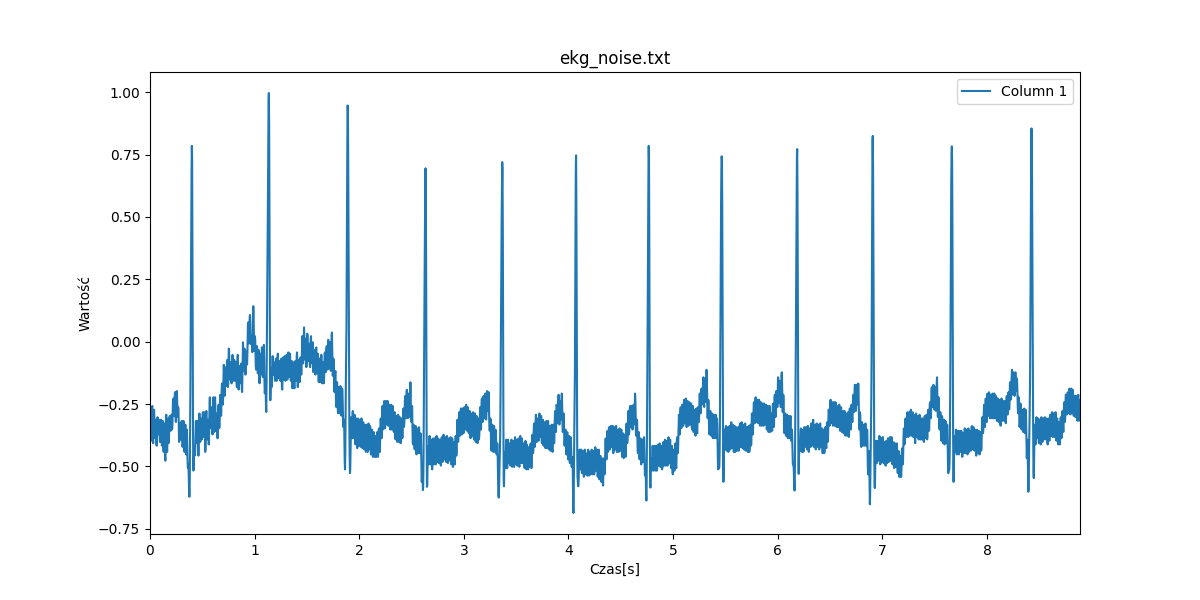

In [71]:
global data_ekg_noise, ekg_noise_time, sampling_frequency_ekg_noise

data_ekg_noise = load_signal_float_values_sampled("./resources/ekg_noise.txt")

plt.figure(figsize=(12, 6))
plt.legend(loc="upper left")

plt.plot(data_ekg_noise[:, 0], data_ekg_noise[:, 1])

plt.legend(["Column " + str(i + 1) for i in range(len(data_ekg_noise[0]))])
plt.title('ekg_noise.txt')
plt.xlabel('Czas[s]')
plt.ylabel('Wartość')
plt.xlim(data_ekg_noise[:, 0][0],
         data_ekg_noise[:, 0][data_ekg_noise[:, 0].size - 1])

plt.show()

# Zadanie nr 2

Celem ćwiczenia jest praktyczne wypróbowanie funkcji numpy.fft
i numpy.ifft do wyznaczania prostej i odwrotnej transformaty Fouriera

In [72]:
# funckja służąca do generowania sygnału sinusoidalnego o zadanych częstotliwościach
# parametry: [częstotliwość], długość, 1/fs
def generate_signal(frequencyArray, length, time_period):
    if len(frequencyArray) == 0:
        return None
    time = np.arange(length)
    signal = np.sin(2 * np.pi * frequencyArray[0] * time * time_period)
    if (len(frequencyArray) == 1):
        return signal

    for i in range(1, len(frequencyArray)):
        signal += np.sin(2 * np.pi * frequencyArray[i] * time * time_period)

    return signal


# funckja służąca do przetwarzania sygnału za pomocą transformaty Fouriera
# parametry: sygnał, długość, fs
def fourier_transform(signal, length, sampling_rate):
    dft_result = np.fft.fft(signal)
    freq = np.fft.fftfreq(length, 1/sampling_rate)
    positive_freq_indices = np.where(freq >= 0)
    amplitudes = np.abs(dft_result) / length
    amplitudes *= 2
    return freq, amplitudes, positive_freq_indices

1. Wygeneruj ciąg próbek odpowiadający fali sinusoidalnej o częstotliwości 50 Hz
i długości 65536.


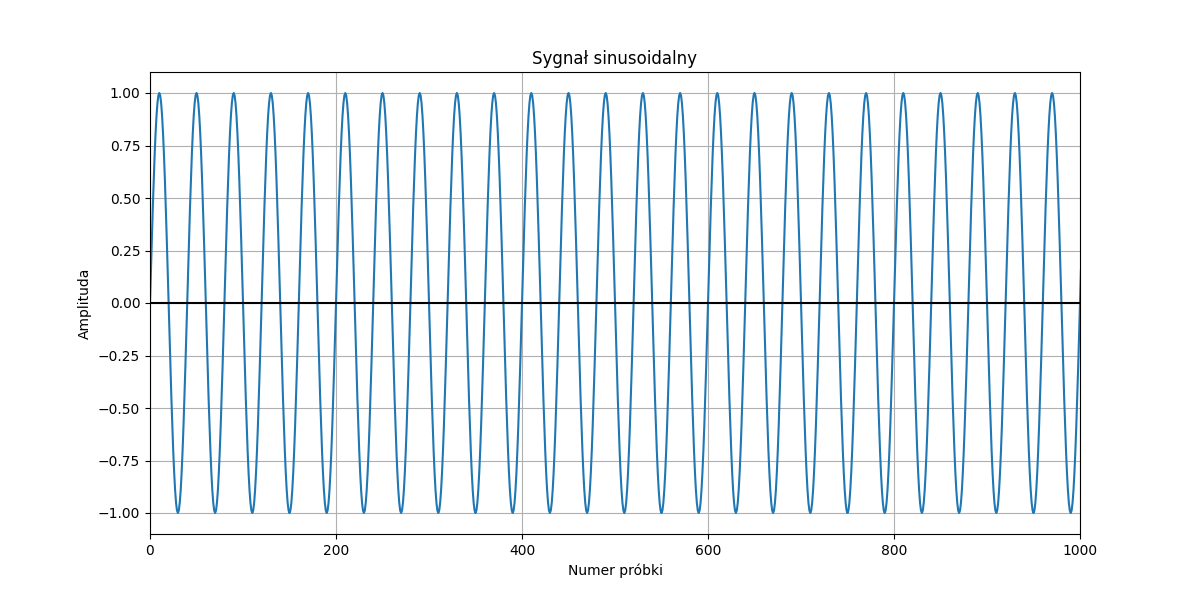

In [73]:
frequency = 50      # f = 50 Hz
length = 65_536
time = np.arange(length)
sampling_rate = 2000      # fs = 2 kHz
time_period = 1/sampling_rate       # t = 1/fs

sinusoidal_signal = np.sin(
    2 * np.pi * frequency * time * time_period)     # sin(2 * pi * f * t)


plt.figure(figsize=(12, 6))
plt.plot(time, sinusoidal_signal)
plt.title('Sygnał sinusoidalny')
plt.ylabel('Amplituda')
plt.xlabel('Numer próbki')
plt.xlim(0, sampling_rate / 2)
plt.axhline(y=0, color='black')
plt.grid(True)
plt.show()

2. Wyznacz dyskretną transformatę Fouriera tego sygnału i przedstaw jego widmo
amplitudowe na wykresie w zakresie częstotliwości [0, fs/2], gdzie fs oznacza
częstotliwość próbkowania.

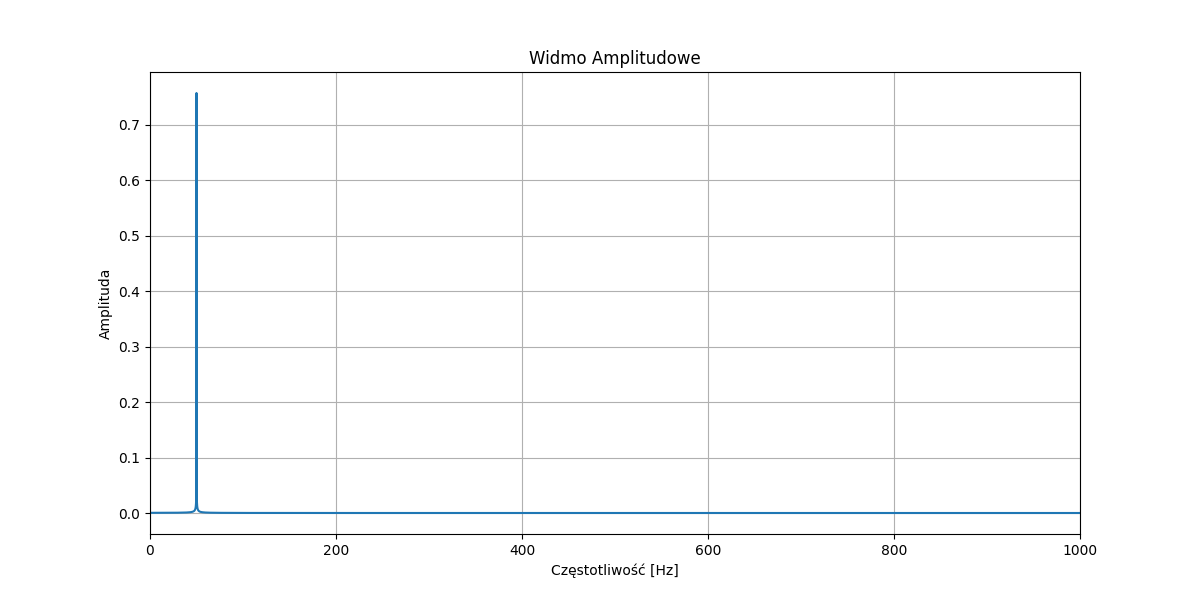

In [74]:
# Dyskretna Transformata Fouriera (DFT)
dft_result = np.fft.fft(sinusoidal_signal)
# Obliczenie częstotliwości
freq = np.fft.fftfreq(length, 1/sampling_rate)
# Indeksy częstotliwości do narysowania (0 do fs/2)
positive_freq_indices = np.where(freq >= 0)
# Widmo amplitudowe
# Normalizacja przez długość sygnału
amplitudes = np.abs(dft_result) / length
# Podwojenie amplitud (z uwzględnieniem symetrii)
amplitudes *= 2

# Narysowanie widma amplitudowego
plt.figure(figsize=(12, 6))
plt.plot(freq[positive_freq_indices], amplitudes[positive_freq_indices])
plt.title('Widmo Amplitudowe')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.xlim(0, sampling_rate / 2)  # Zakres częstotliwości [0, fs/2]
plt.grid(True)
plt.show()

3. Wygeneruj ciąg próbek mieszaniny dwóch fal sinusoidalnych (tzn. ich kombinacji
liniowej) o częstotliwościach 50 i 60 Hz. Wykonaj zadanie z punktu 2 dla tego
sygnału.

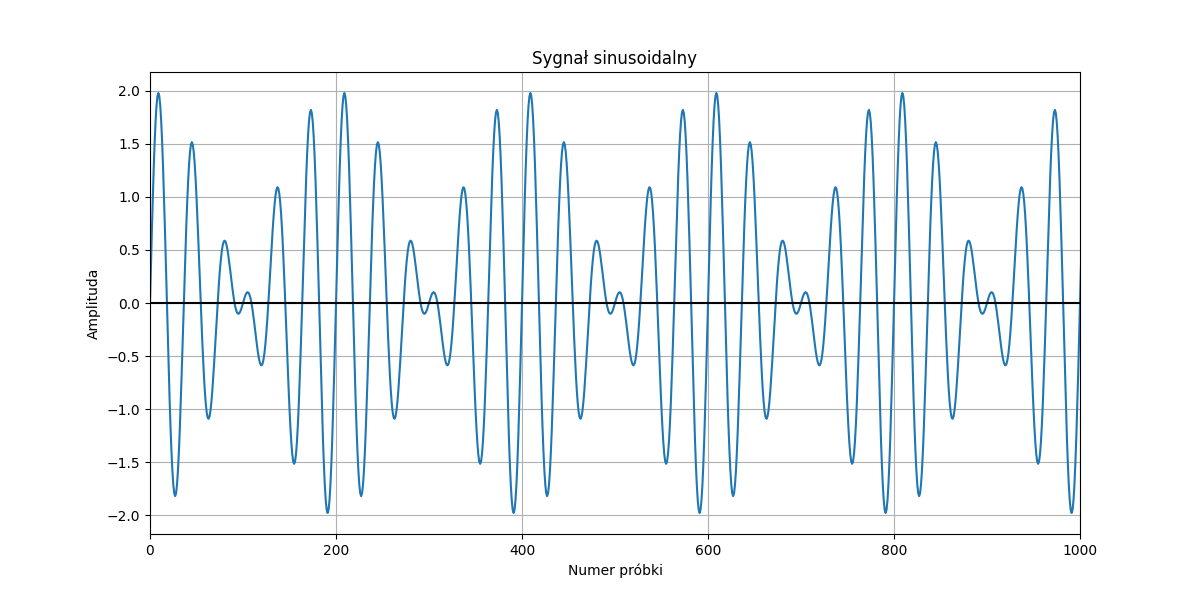

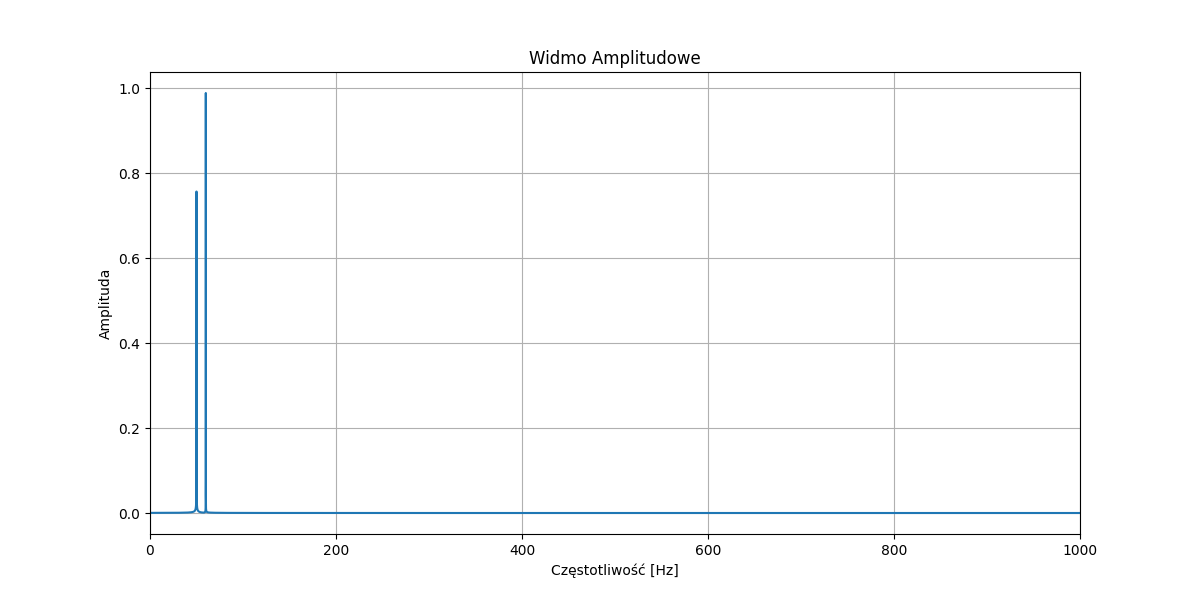

In [75]:
frequency_1 = 50
frequency_2 = 60
length = 65_536
time = np.arange(length)
sampling_rate = 2000      # fs = 2 kHz
time_period = 1/sampling_rate       # t = 1/fs

mixed_signal = generate_signal([frequency_1, frequency_2], length, time_period)

plt.figure(figsize=(12, 6))
plt.plot(time, mixed_signal)
plt.title('Sygnał sinusoidalny')
plt.ylabel('Amplituda')
plt.xlabel('Numer próbki')
plt.xlim(0, sampling_rate / 2)
plt.axhline(y=0, color='black')
plt.grid(True)
plt.show()

freq, amplitudes, positive_freq_indices = fourier_transform(
    mixed_signal, length, sampling_rate)

# Narysowanie widma amplitudowego
plt.figure(figsize=(12, 6))
plt.plot(freq[positive_freq_indices], amplitudes[positive_freq_indices])
plt.title('Widmo Amplitudowe')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.xlim(0, sampling_rate / 2)  # Zakres częstotliwości [0, fs/2]
plt.grid(True)
plt.show()

4. Powtórz eksperymenty dla różnych czasów trwania sygnałów, tzn. dla różnych
częstotliwości próbkowania.

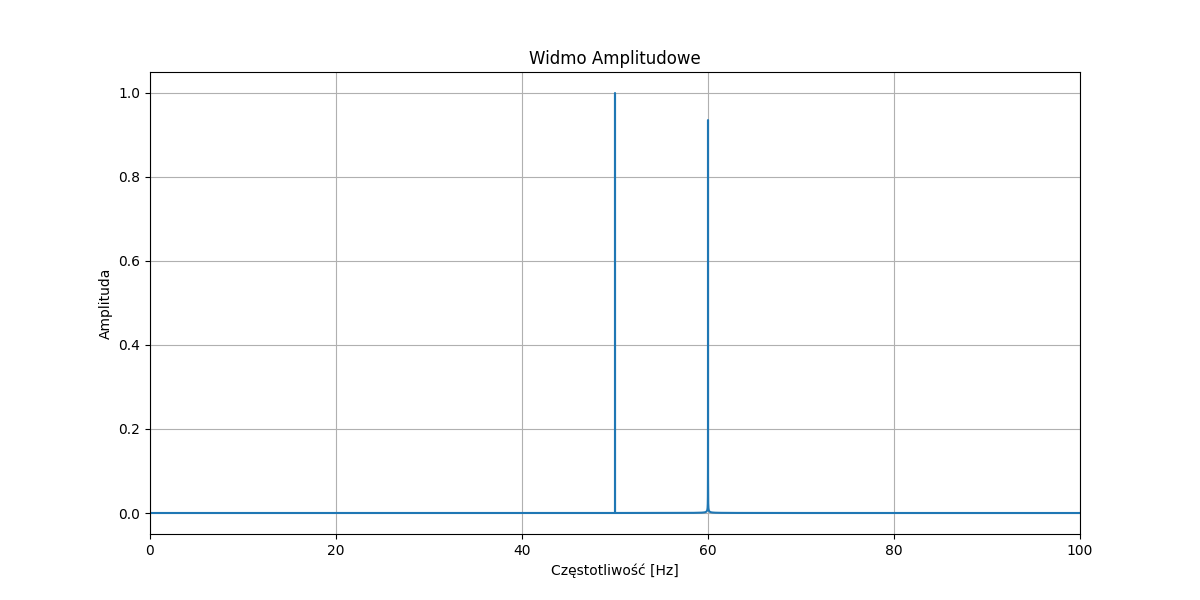

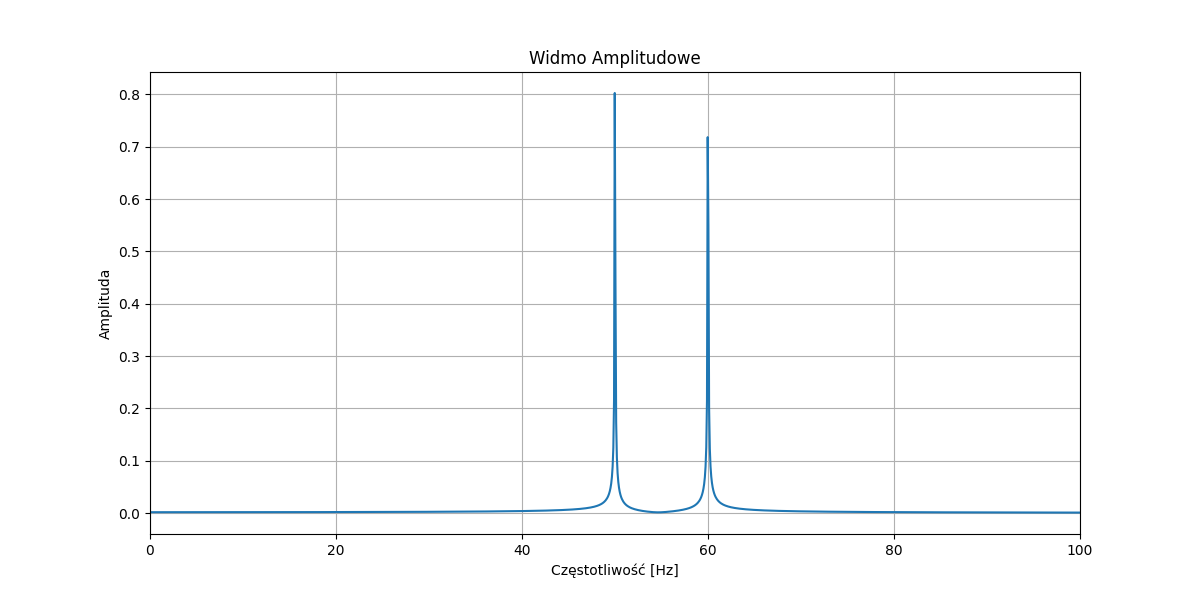

In [76]:
frequency_1 = 50
frequency_2 = 60
length = 65_536
time = np.arange(length)

# Częstotliwość próbkowania 200 Hz
sampling_rate = 200
time_period = 1/sampling_rate       # t = 1/fs
mixed_signal = generate_signal([frequency_1, frequency_2], length, time_period)

freq, amplitudes, positive_freq_indices = fourier_transform(
    mixed_signal, length, sampling_rate)
# Narysowanie widma amplitudowego
plt.figure(figsize=(12, 6))
plt.plot(freq[positive_freq_indices], amplitudes[positive_freq_indices])
plt.title('Widmo Amplitudowe')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.xlim(0, sampling_rate / 2)  # Zakres częstotliwości [0, fs/2]
plt.grid(True)
plt.show()

# Częstotliwość próbkowania 5 kHz
sampling_rate = 5000
time_period = 1/sampling_rate       # t = 1/fs
mixed_signal = generate_signal([50, 60], length, time_period)

freq, amplitudes, positive_freq_indices = fourier_transform(
    mixed_signal, length, sampling_rate)

plt.figure(figsize=(12, 6))
plt.plot(freq[positive_freq_indices], amplitudes[positive_freq_indices])
plt.title('Widmo Amplitudowe')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.xlim(0, 100)
plt.grid(True)
plt.show()

5. Wyznacz odwrotne transformaty Fouriera ciągów wyznaczonych w zadaniu 2
i porównaj z ciągami oryginalnymi.

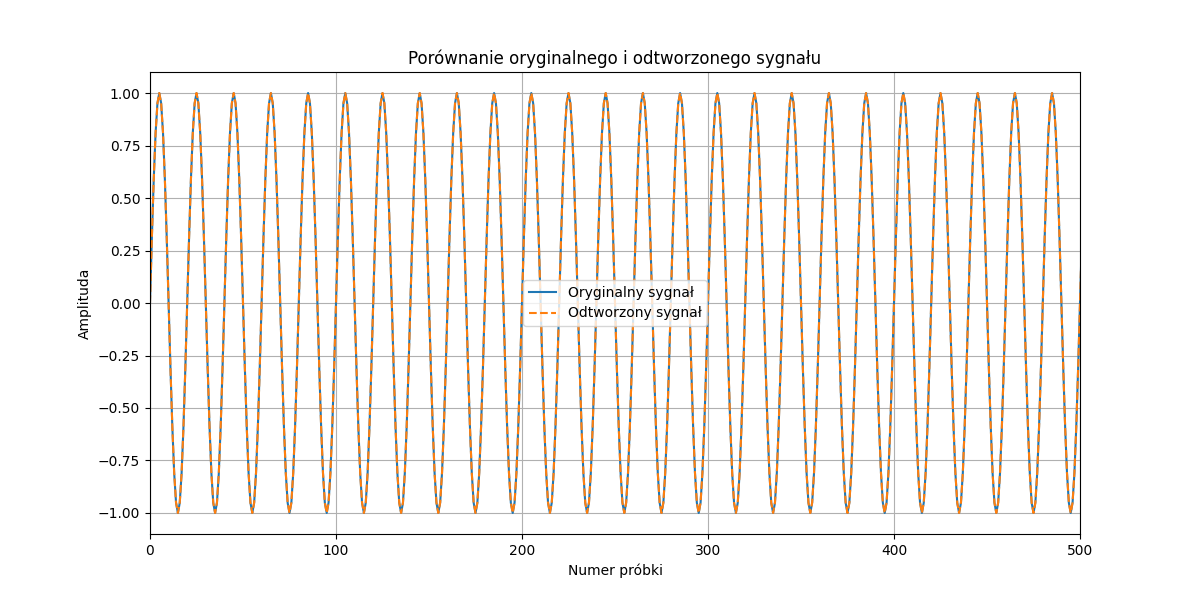

In [77]:
frequency = 50  # Hz

length = 65536
sampling_rate = 1000  # Hz

# Czas trwania sygnału
time = np.arange(length)

# Wygenerowanie fali sinusoidalnej
sinusoidal_signal = np.sin(2 * np.pi * frequency * time / sampling_rate)

# Dyskretna Transformata Fouriera (DFT)
dft_result = np.fft.rfft(sinusoidal_signal)

# Obliczenie częstotliwości
freq = np.fft.rfftfreq(length, 1/sampling_rate)
    
# IDFT - Odwrotna Dyskretna Transformata Fouriera
reconstructed_signal = np.fft.irfft(dft_result)

plt.figure(figsize=(12, 6))
plt.plot(time, sinusoidal_signal, label='Oryginalny sygnał')
plt.plot(time, reconstructed_signal,
         label='Odtworzony sygnał', linestyle='--')
plt.title('Porównanie oryginalnego i odtworzonego sygnału')
plt.xlabel('Numer próbki')
plt.ylabel('Amplituda')
plt.xlim(0, sampling_rate / 2)  # Zakres częstotliwości [0, fs/2]
plt.legend()
plt.grid(True)
plt.show()

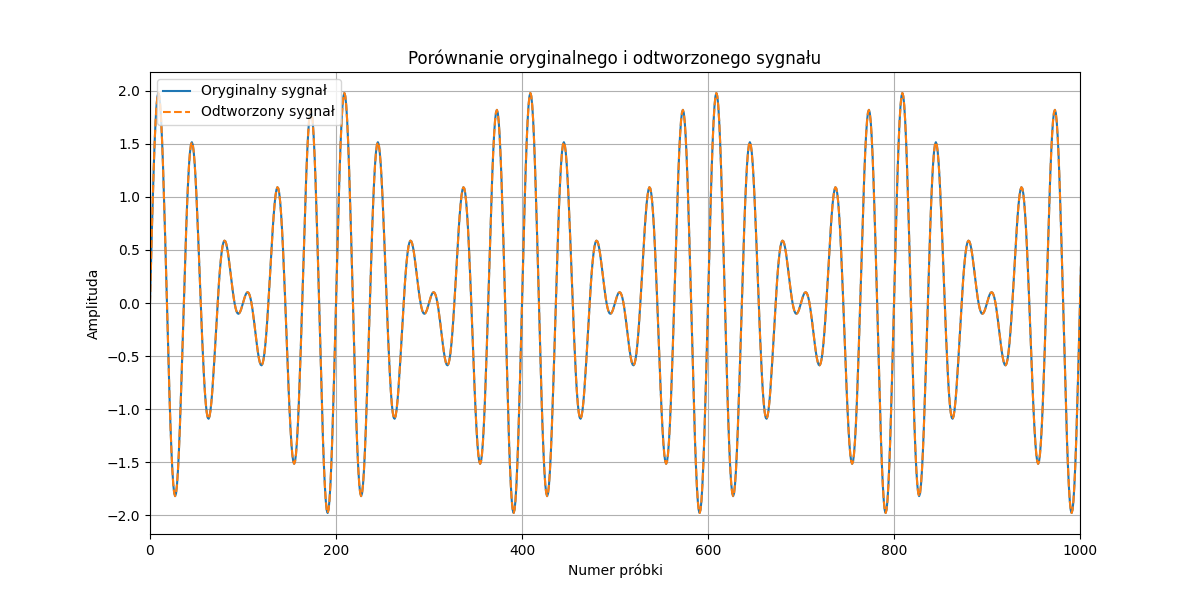

In [78]:
frequency_1 = 50
frequency_2 = 60
length = 65_536
time = np.arange(length)
sampling_rate = 2000      # fs = 2 kHz
time_period = 1/sampling_rate       # t = 1/fs

mixed_signal = generate_signal([frequency_1, frequency_2], length, time_period)

dft_result = np.fft.fft(mixed_signal)

reconstructed_signal = np.fft.ifft(dft_result)

plt.figure(figsize=(12, 6))
plt.plot(time, mixed_signal, label='Oryginalny sygnał')
plt.plot(time, reconstructed_signal,
         label='Odtworzony sygnał', linestyle='--')
plt.title('Porównanie oryginalnego i odtworzonego sygnału')
plt.xlabel('Numer próbki')
plt.ylabel('Amplituda')
plt.xlim(0, sampling_rate / 2)  # Zakres częstotliwości [0, fs/2]
plt.legend()
plt.grid(True)
plt.show()

# Zadanie nr 3
Celem ćwiczenia jest obserwacja widma sygnału EKG.

1. Wczytać sygnał ecg100.txt i ocenić go wizualnie na wykresie

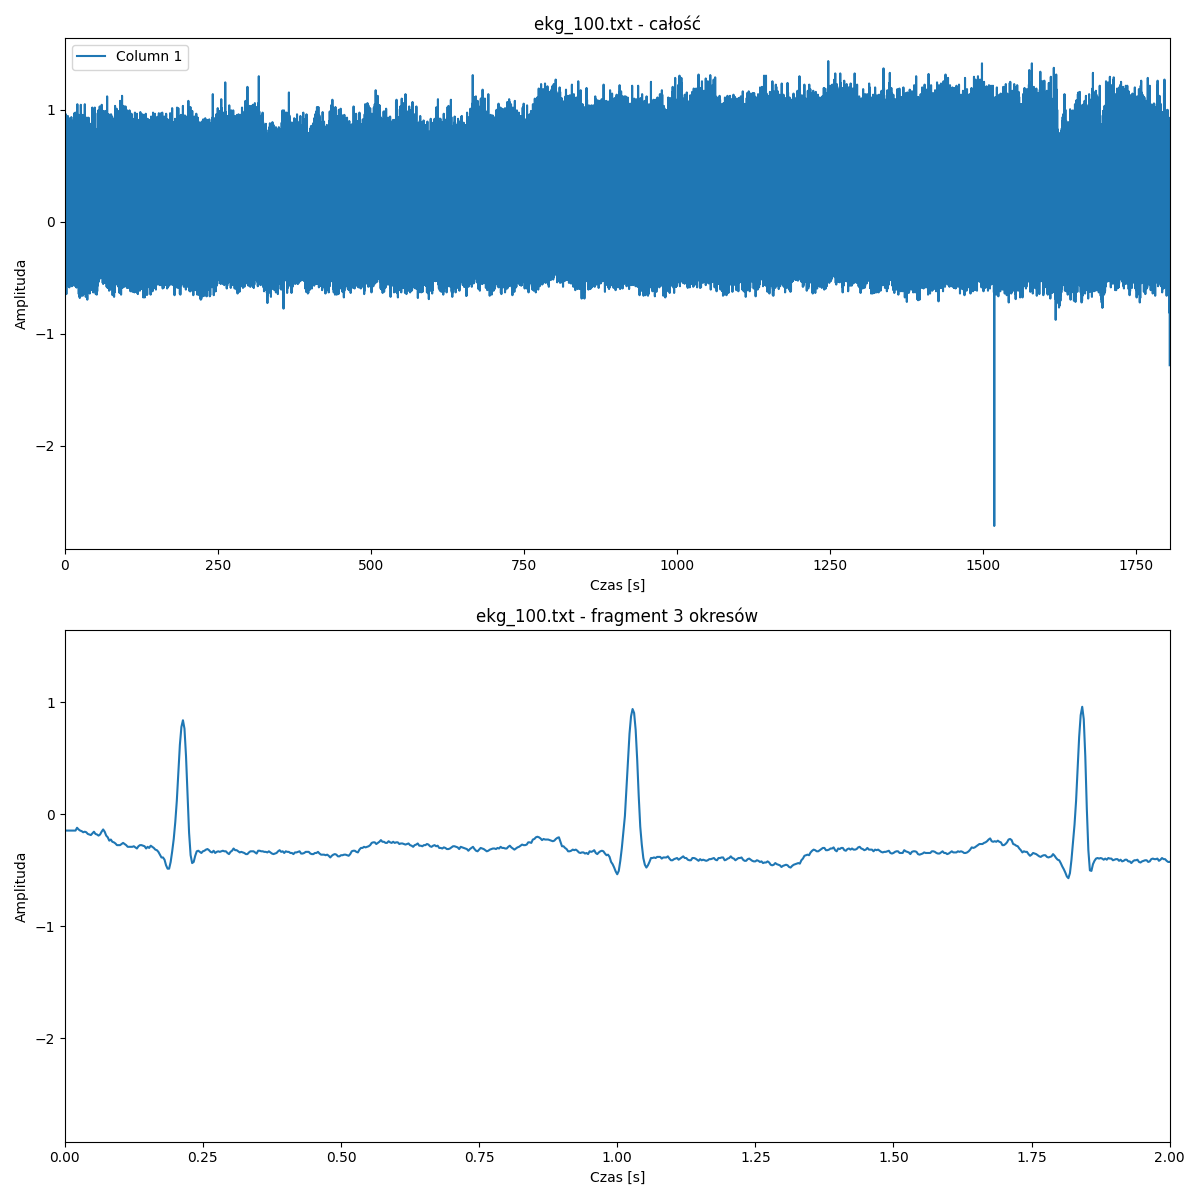

In [79]:
global data_ekg_100, ekg_100_time

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(ekg_100_time, data_ekg_100)
ax1.set_title('ekg_100.txt - całość')
ax1.set_xlabel('Czas [s]')
ax1.set_ylabel('Amplituda')
ax1.legend(["Column " + str(i + 1) for i in range(len(data_ekg_100[0]))])
ax1.set_xlim(ekg_100_time[0], ekg_100_time[-1])

ax2.plot(ekg_100_time, data_ekg_100)
ax2.set_title('ekg_100.txt - fragment 3 okresów')
ax2.set_xlabel('Czas [s]')
ax2.set_ylabel('Amplituda')
ax1.legend(["Column " + str(i + 1) for i in range(len(data_ekg_100[0]))])
ax2.set_xlim(ekg_100_time[0], 2)

plt.tight_layout()
plt.show()

2. Wyznaczyć jego dyskretną transformatę Fouriera i przedstawić widmo amplitudowe sygnału w funkcji częstotliwości w zakresie [0, fs/2], gdzie fs oznacza
częstotliwość próbkowania.

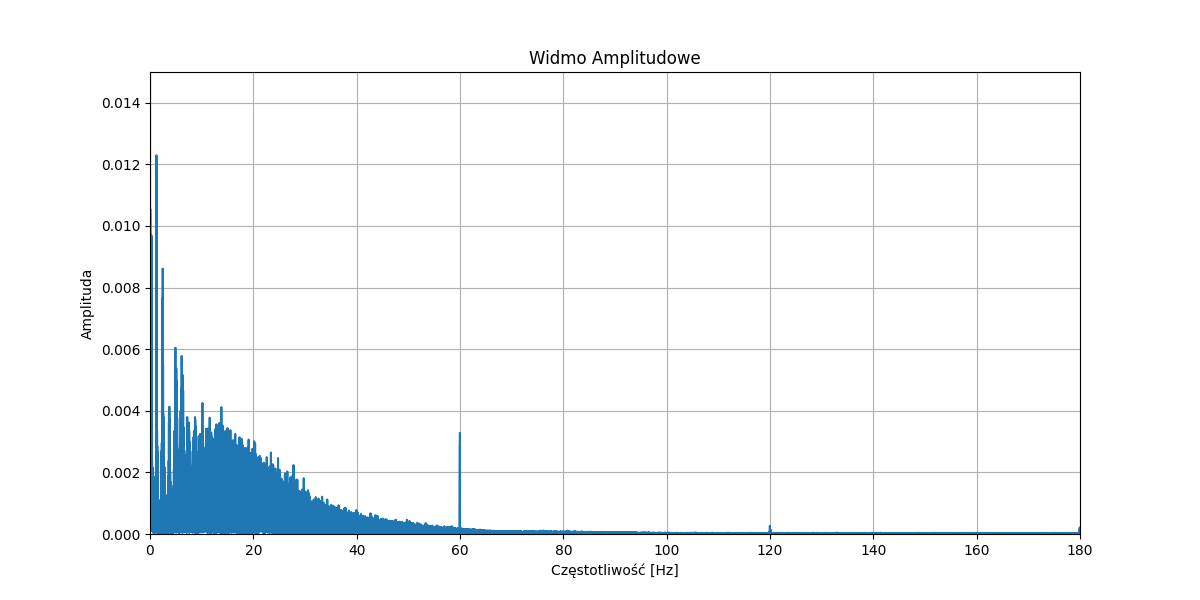

In [80]:
global data_ekg_100, ekg_100_time

length = len(data_ekg_100[:, 0])
sampling_rate = 360

# Wyznacz dyskretną transformatę Fouriera tego sygnału i przedstaw jego widmo
# amplitudowe na wykresie w zakresie częstotliwości [0, fs/2], gdzie fs oznacza
# częstotliwość próbkowania.

# Dyskretna Transformata Fouriera (DFT)
dft_result = np.fft.rfft(data_ekg_100[:, 0])
# Obliczenie częstotliwości
freq = np.fft.rfftfreq(length, 1/sampling_rate)

# Widmo amplitudowe
# Normalizacja przez długość sygnału
amplitudes = np.abs(dft_result) / length
# Podwojenie amplitud (z uwzględnieniem symetrii)
amplitudes *= 2

# Narysowanie widma amplitudowego
plt.figure(figsize=(12, 6))
plt.plot(freq, amplitudes)
plt.title('Widmo Amplitudowe')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.xlim(0, sampling_rate / 2)  # Zakres częstotliwości [0, fs/2]
plt.ylim(0, 0.015)
plt.grid(True)
plt.show()

3. Wyznaczyć odwrotną dyskretną transformatę Fouriera ciągu wyznaczonego w
punkcie 2 i porównać otrzymany ciąg próbek z pierwotnym sygnałem ecg100
(można wyznaczyć różnicę sygnałów).

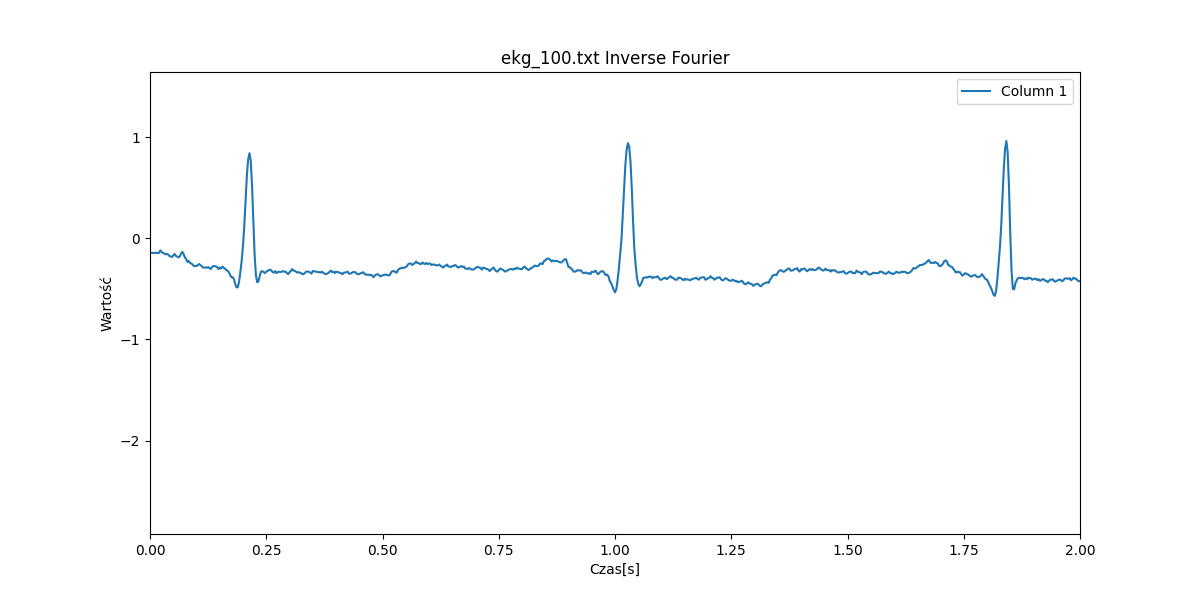

In [81]:
global data_ekg_100, ekg_100_time

length = len(dft_result)

invdft_result = np.fft.irfft(dft_result)

plt.figure(figsize=(12, 6))
plt.plot(ekg_100_time, invdft_result)

plt.legend(["Column " + str(i + 1) for i in range(len(data_ekg_100[0]))])
plt.title('ekg_100.txt Inverse Fourier')
plt.xlabel('Czas[s]')
plt.ylabel('Wartość')
plt.xlim(ekg_100_time[0], 2)

plt.show()

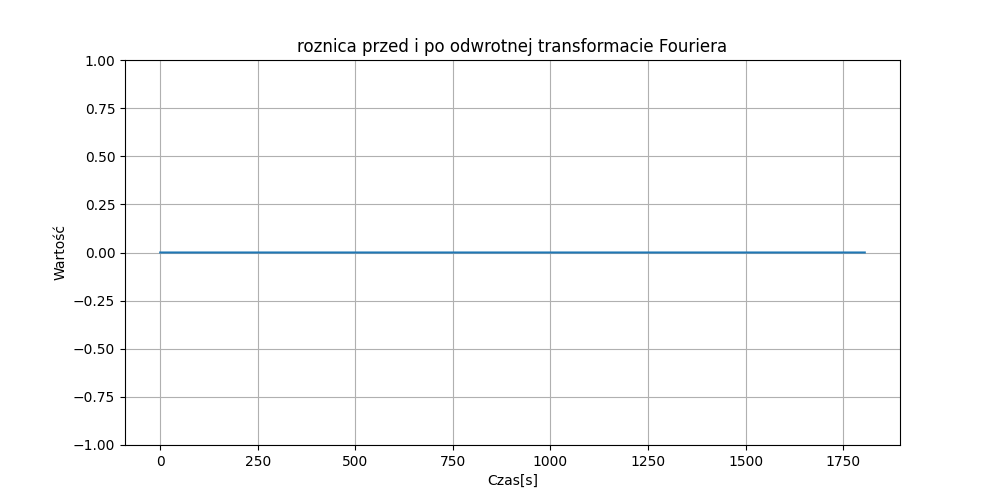

In [82]:
global data_ekg_100, ekg_100_time

roznica = data_ekg_100[:, 0] - invdft_result
plt.figure(figsize=(10, 5))
plt.plot(ekg_100_time, roznica)
plt.title('roznica przed i po odwrotnej transformacie Fouriera')
plt.xlabel('Czas[s]')
plt.ylabel('Wartość')
plt.ylim(-1, 1)
plt.grid(True)
plt.show()

Obserwujemy, że między sygnałem oryginalnym, a sygnałem otrzymanym z odwrotnej dyskretnej transformaty Fouriera - nie ma żadnej różnicy (Wykres różnicy to prosta o stałej wartości y=0)


# Zadanie nr 4
Celem ćwiczenia jest praktyczne wypróbowanie działania filtrów
w celu wyeliminowania niepożądanych zakłóceń z sygnału EKG. Proszę wybrać
rodzaj filtra do eksperymentowania, np. Butterwortha lub Czebyszewa. Do filtracji
wykorzystać gotowe funkcje z biblioteki scipy.signal [7]. Biblioteka posiada również
funkcje wspomagające projektowanie filtrów, które można zastosować.

1. Wczytaj sygnał ekg noise.txt i zauważ zakłócenia nałożone na sygnał. Wykreślić
częstotliwościową charakterystykę amplitudową sygnału

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


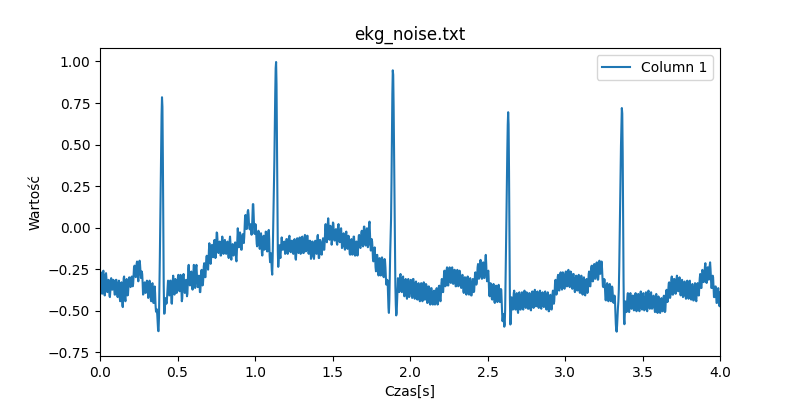

In [83]:
global data_ekg_noise, ekg_noise_time


plt.figure(figsize=(8, 4))
plt.legend(loc="upper left")

plt.plot(data_ekg_noise[:, 0], data_ekg_noise[:, 1])

plt.legend(["Column " + str(i + 1) for i in range(len(data_ekg_noise[0]))])
plt.title('ekg_noise.txt')
plt.xlabel('Czas[s]')
plt.ylabel('Wartość')
plt.xlim(data_ekg_noise[:, 0][0], 4)

plt.show()

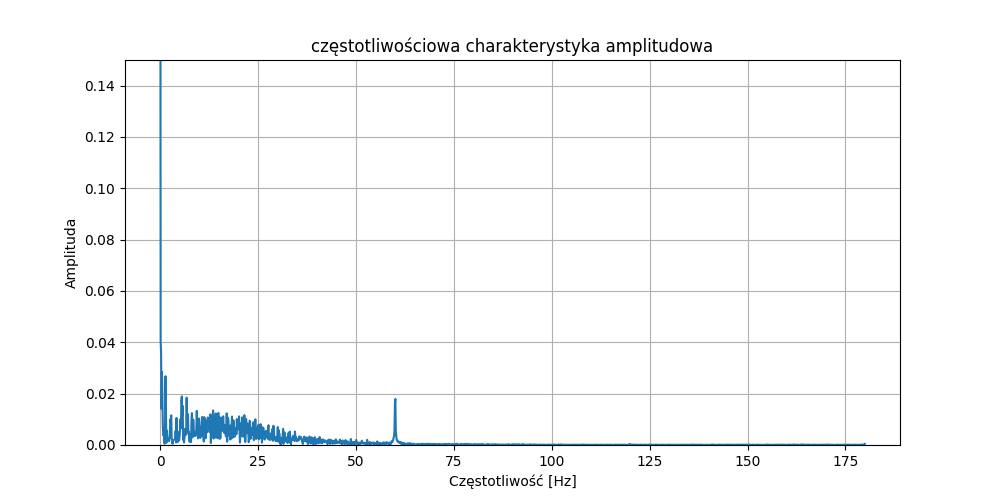

In [84]:
global data_ekg_noise, ekg_noise_time

length = len(data_ekg_noise)
sampling_rate = 360      # fs = 2 kHz

dft_result = np.abs(np.fft.rfft(data_ekg_noise[:, 1])) / length
freq = np.fft.rfftfreq(length, 1/sampling_rate)
#positive_freq_indices = np.where(freq >= 0)

# Narysowanie charakterystyki
plt.figure(figsize=(10, 5))
plt.plot(freq, dft_result)
plt.title('częstotliwościowa charakterystyka amplitudowa')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.grid(True)
#plt.axvline(60, color='red')
plt.ylim(0, 0.15)
plt.show()

2. Zbadaj filtr dolnoprzepustowy o częstotliwości granicznej 60 Hz w celu redukcji
zakłóceń pochodzących z sieci zasilającej. Wyznacz parametry filtra, wykreśl
jego charakterystykę (zależność tłumienia od częstotliwości), przebieg sygnału
po filtracji oraz jego widmo. Można też wyznaczyć różnicę między sygnałem
przed i po filtracji i widmo tej różnicy.

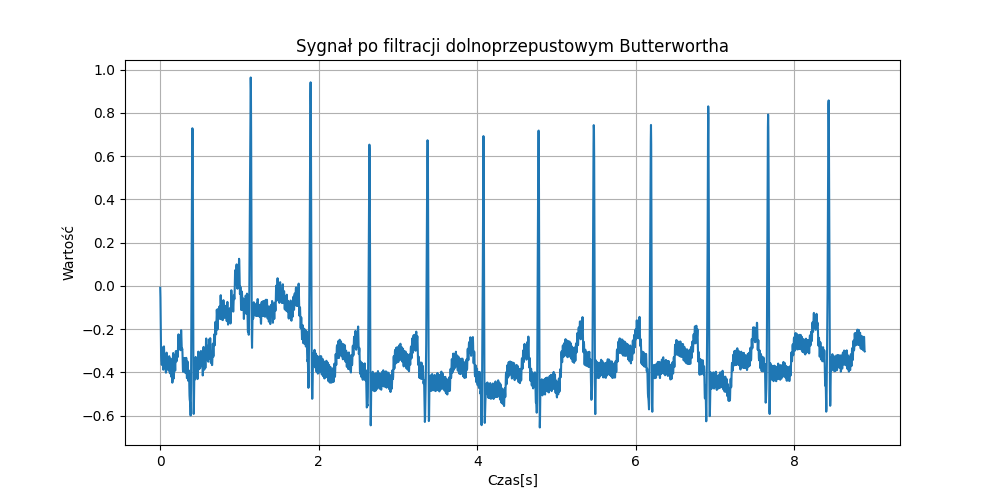

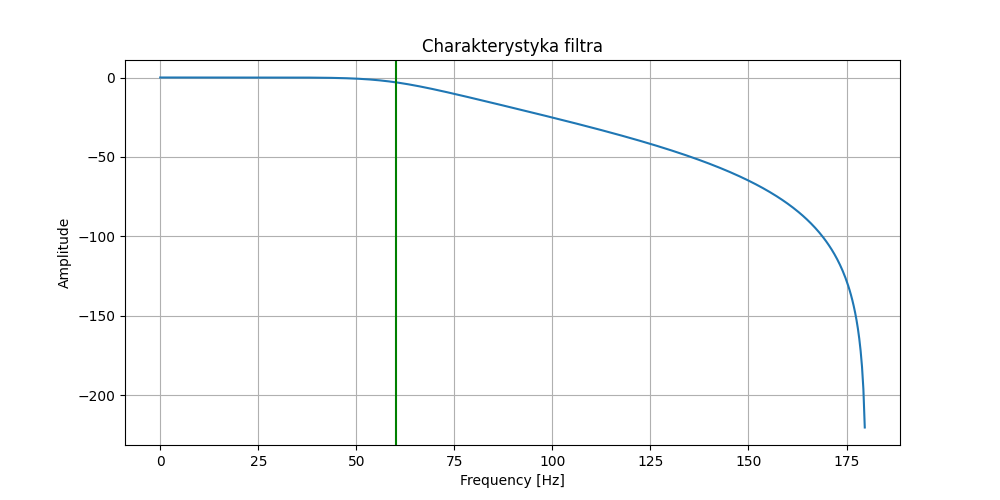

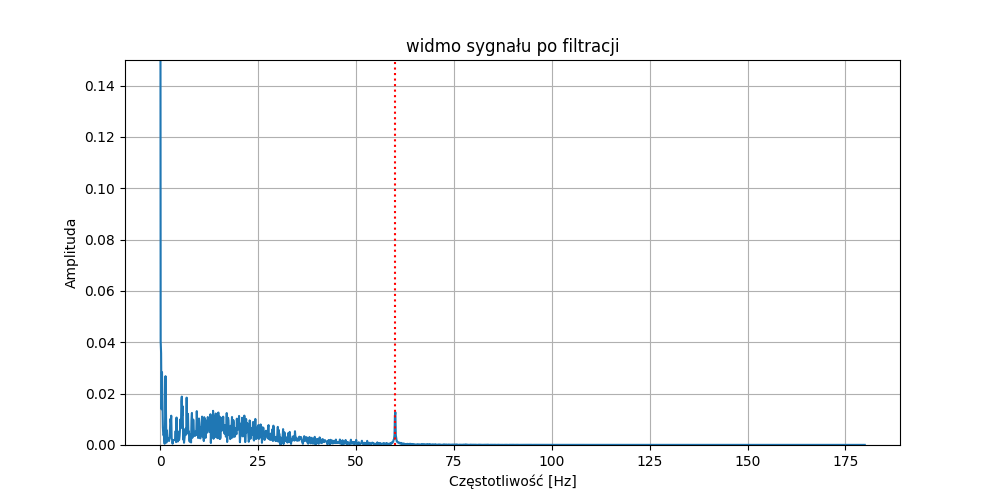

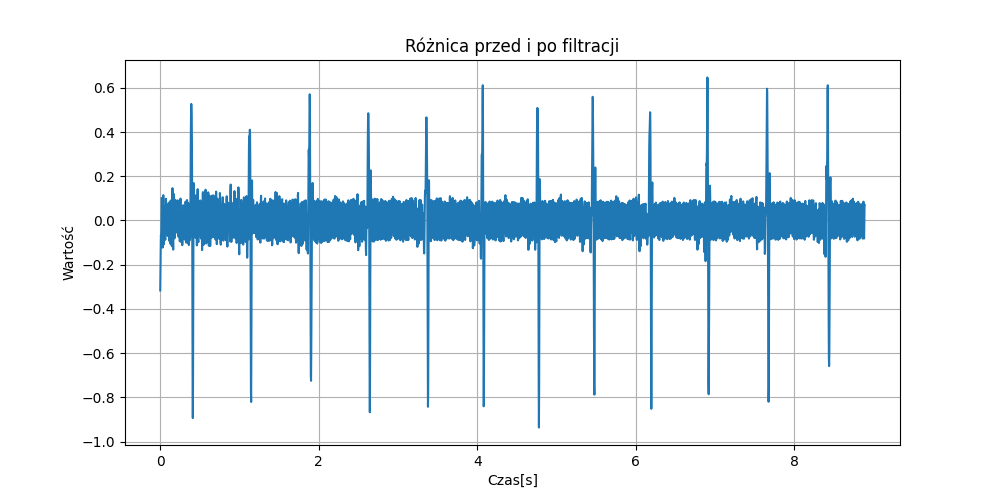

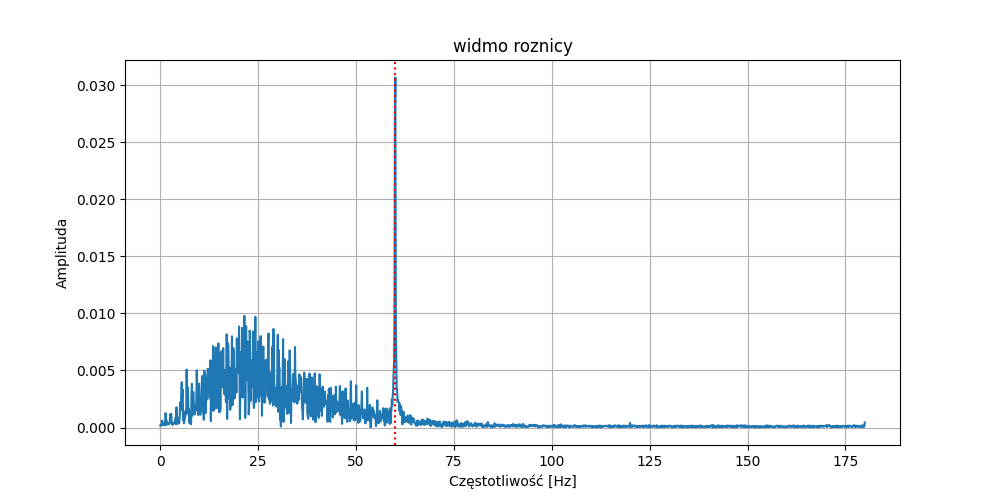

In [85]:
global data_ekg_noise
sampling_rate = 360

# dolnoprzepustowy - parametry i sygnał po filtracji
sos = sig.butter(4, 60, 'lowpass', output='sos', fs=360)
filtered_data = sig.sosfilt(sos, data_ekg_noise[:, 1])

length = len(filtered_data)

plt.figure(figsize=(10, 5))
plt.plot(data_ekg_noise[:, 0], filtered_data)
plt.title('Sygnał po filtracji dolnoprzepustowym Butterwortha')
plt.xlabel('Czas[s]')
plt.ylabel('Wartość')
plt.grid(True)
plt.show()

# wykreslenie charakterystyki filtra
b, a = sig.butter(4, 60, 'low', fs=360)
w, h = sig.freqz(b, a)
# plt.semilogx(w*360/(2*np.pi), 20 * np.log10(abs(h)))

plt.figure(figsize=(10, 5))
plt.plot(w*360/(2*np.pi), 20 * np.log10(abs(h)))
plt.title('Charakterystyka filtra')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.grid(which='both', axis='both')
plt.axvline(60, color='green')  # cutoff frequency
plt.show()

# widmo sygnału po filtracji
dft_result = np.abs(np.fft.rfft(filtered_data)) / length
freq = np.fft.rfftfreq(length, 1/sampling_rate)

plt.figure(figsize=(10, 5))
plt.plot(freq, dft_result)
plt.title('widmo sygnału po filtracji')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.axvline(60, color='red', linestyle=':')
plt.ylim(0, 0.15)
plt.show()

# roznica przed i po filtracji
roznica = data_ekg_noise[:, 1] - filtered_data
plt.figure(figsize=(10, 5))
plt.plot(data_ekg_noise[:, 0], roznica)
plt.title('Różnica przed i po filtracji')
plt.xlabel('Czas[s]')
plt.ylabel('Wartość')
plt.grid(True)
plt.show()

# widmo roznicy przed i po filtracji
dft_roznica = np.abs(np.fft.rfft(roznica)) / length
freq = np.fft.rfftfreq(length, 1/sampling_rate)

plt.figure(figsize=(10, 5))
plt.plot(freq, dft_roznica)
plt.title('widmo roznicy')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.axvline(60, color='red', linestyle=':')
plt.show()

Zastosowany tutaj filtr jest filtrem dolnoprzepustowym Butterworth'a o rzędzie = 10 oraz częstotliwości granicznej = 58Hz. Od rzędu filtra zależy jak szybko wzrastać będzie tłumienie częstotliwości, oraz jego dokładność. Zaobserwować to możemy na wykresie 2 - Charakterystyka Filtra. Poniżej widoczny jest ponownie przedstawiony ten sam wykres, oraz drugi o innych parametrach filtra. Zielona kreska oznacza częstotliwość 60Hz, powyżej której częstotliwości chcemy odfiltrować.

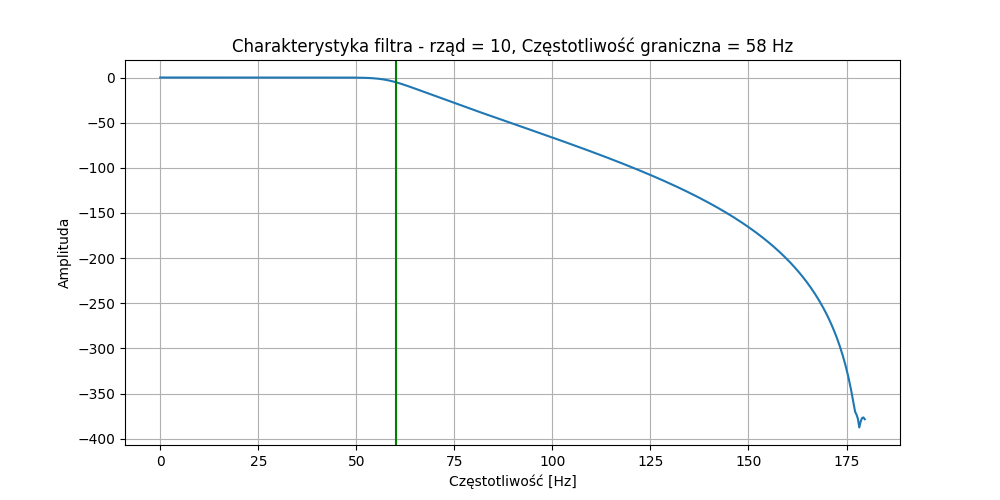

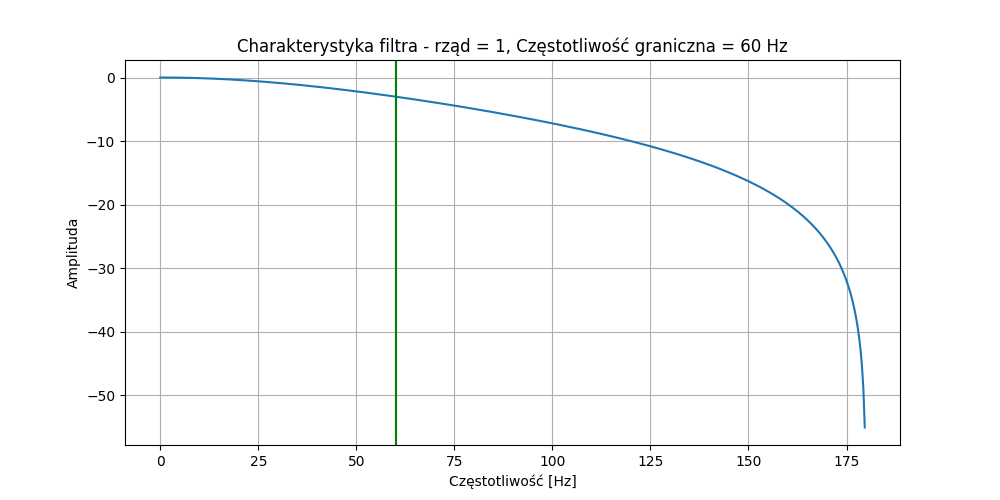

In [86]:
# wykreslenie charakterystyki filtra
b, a = sig.butter(10, 58, 'low', fs=360)
w, h = sig.freqz(b, a)
# plt.semilogx(w*360/(2*np.pi), 20 * np.log10(abs(h)))

plt.figure(figsize=(10, 5))
plt.plot(w*360/(2*np.pi), 20 * np.log10(abs(h)))
plt.title('Charakterystyka filtra - rząd = 10, Częstotliwość graniczna = 58 Hz')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.grid(which='both', axis='both')
plt.axvline(60, color='green')  # cutoff frequency
plt.show()

# wykreslenie charakterystyki filtra
b, a = sig.butter(1, 60, 'low', fs=360)
w, h = sig.freqz(b, a)
# plt.semilogx(w*360/(2*np.pi), 20 * np.log10(abs(h)))

plt.figure(figsize=(10, 5))
plt.plot(w*360/(2*np.pi), 20 * np.log10(abs(h)))
plt.title('Charakterystyka filtra - rząd = 1, Częstotliwość graniczna = 60 Hz')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.grid(which='both', axis='both')
plt.axvline(60, color='green')  # cutoff frequency
plt.show()

Zastosowany tutaj filtr jest filtrem dolnoprzepustowym Butterworth'a o rzędzie = 10 oraz częstotliwości granicznej = 58Hz. Od rzędu filtra zależy jak szybko wzrastać będzie tłumienie częstotliwości, oraz jego dokładność. Zaobserwować to możemy na wykresie 2 - Charakterystyka Filtra. Powyżej widoczny jest ponownie przedstawiony ten sam wykres, oraz drugi o innych parametrach filtra. Zielona kreska oznacza częstotliwość 60Hz, powyżej której częstotliwości chcemy odfiltrować.

3. Zastosuj następnie, do sygnału otrzymanego w punkcie 2, filtr górnoprzepustowy
o częstotliwości granicznej 5 Hz w celu eliminacji pływania linii izoelektrycznej.
Sporządź wykresy sygnałów jak w punkcie 2

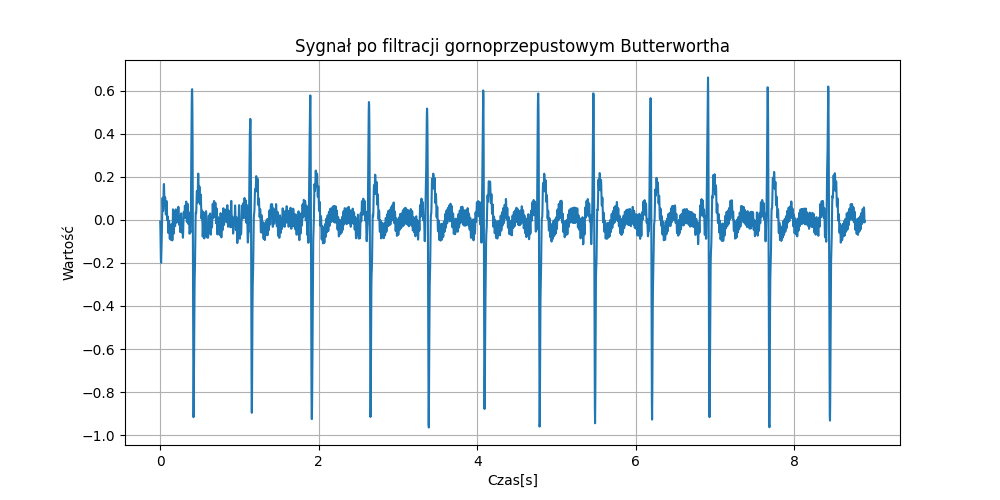

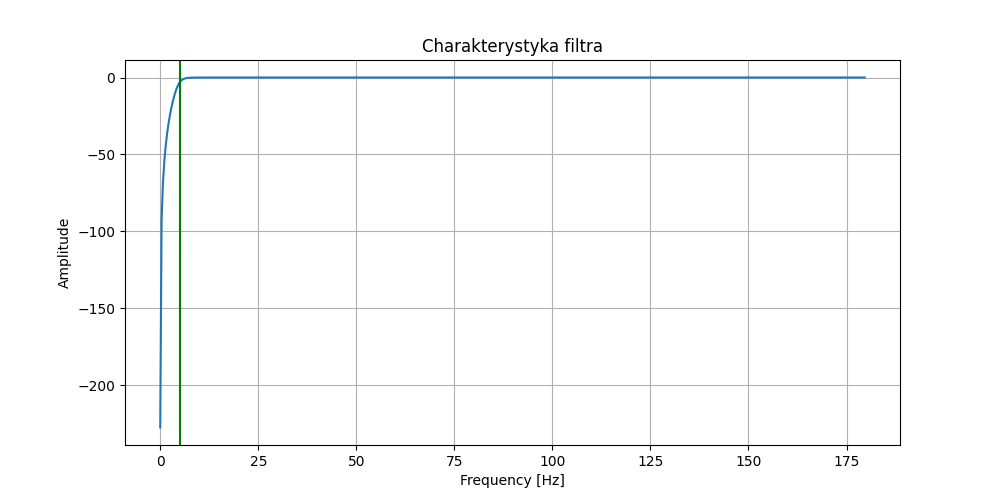

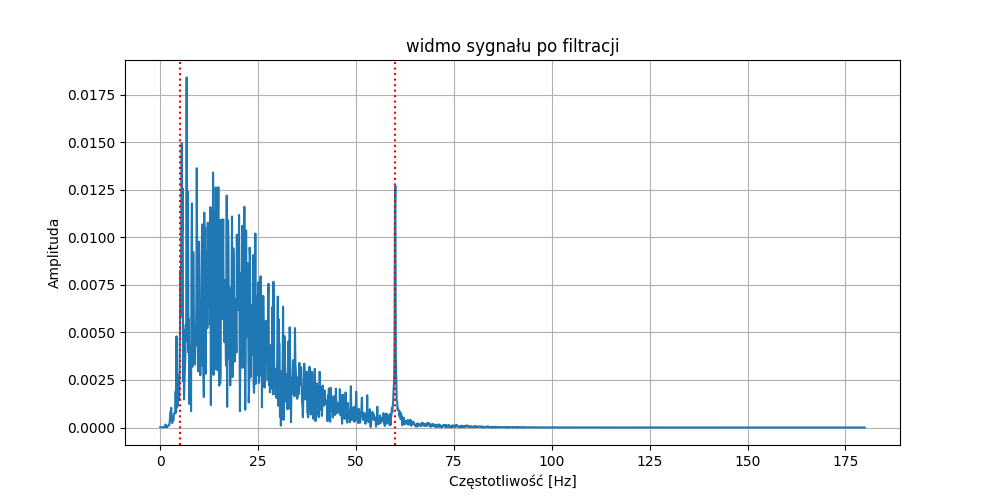

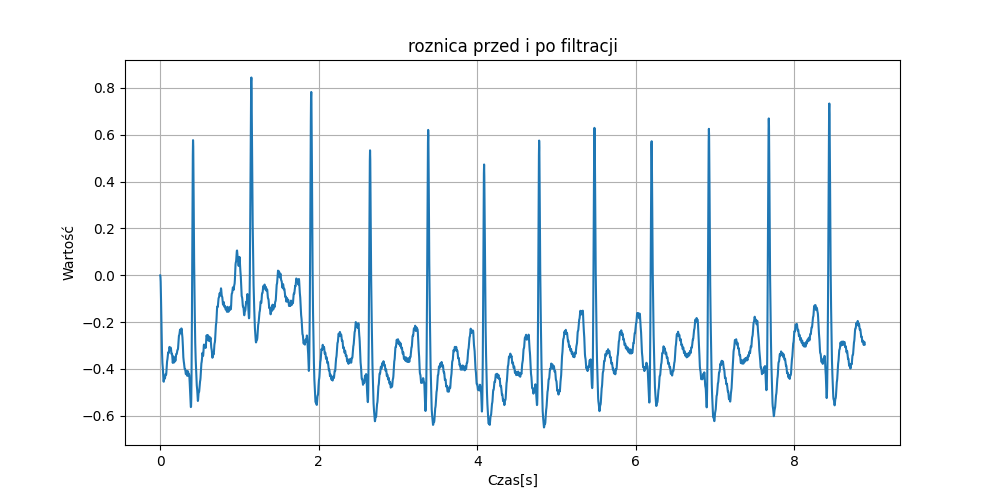

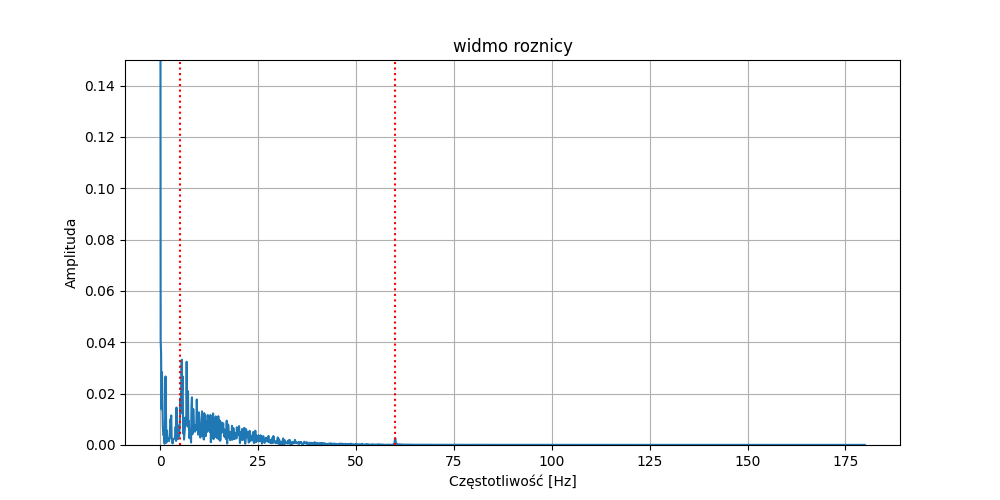

In [87]:
# filtr górnoprzepustowy - 5Hz i sygnał po filtracji
sos = sig.butter(4, 5, 'highpass', output='sos', fs=360)
filtered_data_2 = sig.sosfilt(sos, filtered_data)
length_2 = len(filtered_data_2)

plt.figure(figsize=(10, 5))
plt.plot(data_ekg_noise[:, 0], filtered_data_2)
plt.title('Sygnał po filtracji gornoprzepustowym Butterwortha')
plt.xlabel('Czas[s]')
plt.ylabel('Wartość')
plt.grid(True)
plt.show()

# charakterystyka
b, a = sig.butter(4, 5, 'highpass', fs=360)
w, h = sig.freqz(b, a)

plt.figure(figsize=(10, 5))
plt.plot(w*360/(2*np.pi), 20 * np.log10(abs(h)))
plt.title('Charakterystyka filtra')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.grid(which='both', axis='both')
plt.axvline(5, color='green')  # cutoff frequency
plt.show()

# widmo po filtracji
dft_result = np.abs(np.fft.rfft(filtered_data_2)) / length_2
freq = np.fft.rfftfreq(length_2, 1/sampling_rate)

plt.figure(figsize=(10, 5))
plt.plot(freq, dft_result)
plt.title('widmo sygnału po filtracji')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.axvline(5, color='red', linestyle=':')
plt.axvline(60, color='red', linestyle=':')
plt.show()

# roznica przed i po filtracji
roznica_2 = filtered_data - filtered_data_2
plt.figure(figsize=(10, 5))
plt.plot(data_ekg_noise[:, 0], roznica_2)
plt.title('roznica przed i po filtracji')
plt.xlabel('Czas[s]')
plt.ylabel('Wartość')
plt.grid(True)
plt.show()

# widmo roznicy przed i po filtracji
dft_roznica_2 = np.abs(np.fft.rfft(roznica_2)) / length_2
freq = np.fft.rfftfreq(length_2, 1/sampling_rate)

plt.figure(figsize=(10, 5))
plt.plot(freq, dft_roznica_2)
plt.title('widmo roznicy')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.axvline(5, color='red', linestyle=':')
plt.axvline(60, color='red', linestyle=':')
plt.ylim(0, 0.15)
plt.show()

Na końcu przedstawione zostało porówanie fragmentu sygnału otrzymanego po filtracji górnoprzepustowym filtrem Butterwortha (wcześniej także dolnoprzepustowym), z odpowiednim fragmentem oryginalnego sygnału.

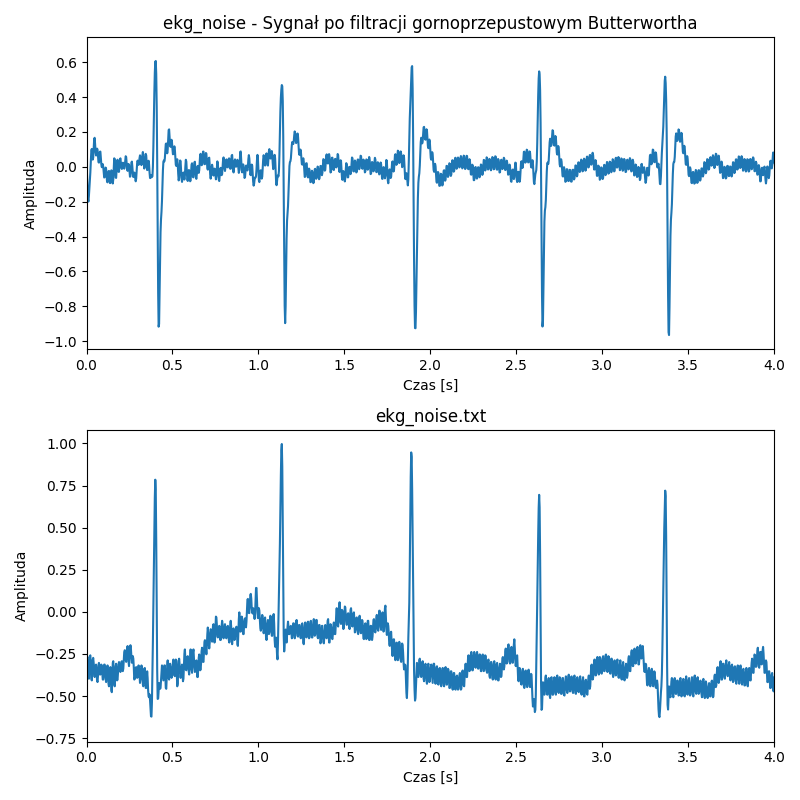

In [88]:
global ekg_100_time, data_ekg_100


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
ax1.plot(data_ekg_noise[:, 0], filtered_data_2)
ax1.set_title('ekg_noise - Sygnał po filtracji gornoprzepustowym Butterwortha')
ax1.set_xlabel('Czas [s]')
ax1.set_ylabel('Amplituda')
ax1.set_xlim(data_ekg_noise[:, 0][0], 4)


ax2.plot(data_ekg_noise[:, 0], data_ekg_noise[:, 1])
ax2.set_title('ekg_noise.txt')
ax2.set_xlabel('Czas [s]')
ax2.set_ylabel('Amplituda')
ax2.set_xlim(data_ekg_noise[:, 0][0], 4)
plt.tight_layout()
plt.show()